In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from os import system
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
####한글화#######
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]
plt.rcParams['font.family'] = 'Malgun Gothic'


In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [10]:
# !pip install folium 


In [2]:
df = pd.read_csv('골프장데이터합친거.csv')

In [7]:
df.isnull().sum()

골프장명           0
골프장지역명         0
대중제,회원제        0
18             0
사용일자           0
사용시간           0
성별코드           0
나이         15228
도민,비도민         0
실력         23448
골프경력       25557
평균사용값      25561
사용성향       26709
판매업체명          0
dtype: int64

In [15]:
del df['골프경력']

In [20]:
df.dropna(axis=0,inplace=True)

In [26]:
df.reset_index(drop=True,inplace=True)

In [27]:
df

,골프장명,골프장지역명,"대중제,회원제",18,사용일자,사용시간,성별코드,나이,"도민,비도민",판매업체명
0,중문GC,서귀포권,대중제,18,20210531,83537,1,40.0,도민,통화
1,더클래식CC,동부권,대중제,18,20210706,133106,2,40.0,도민,통화
2,더클래식CC,동부권,대중제,18,20210706,134812,2,40.0,도민,통화
3,제주CC,제주시권,대중제,18,20210706,134846,2,40.0,도민,통화
4,스프링데일CC,동부권,대중제,18,20210706,135804,1,40.0,도민,통화
...,...,...,...,...,...,...,...,...,...,...
30093,라온GC,서부권,대중제,27,20201224,1132,2,30.0,도민,라온GC
30094,아덴힐GC,서부권,대중제,18,20210115,809,1,40.0,도민,아덴힐GC
30095,아덴힐GC,서부권,대중제,18,20210113,816,2,40.0,도민,아덴힐GC
30096,아덴힐GC,서부권,대중제,18,20201228,1215,2,40.0,도민,아덴힐GC


In [33]:
df.성별코드=df.성별코드.apply(lambda x: 2 if x==0 else x)

In [34]:
df.성별코드.value_counts()

1    22069
2     8029
Name: 성별코드, dtype: int64

In [36]:
df.나이.value_counts()

40.0    15244
50.0     7252
30.0     5432
60.0     1105
20.0      950
10.0       95
70.0       20
Name: 나이, dtype: int64

In [40]:
df['대중제,회원제'].value_counts()

대중제        21256
회원제+대중제     5170
회원제         3672
Name: 대중제,회원제, dtype: int64

In [43]:
df['18'].value_counts()

18    15005
27     9257
36     5403
9       433
Name: 18, dtype: int64

In [49]:
df.rename(columns={'18':'홀수'},inplace=True)
df.iloc[0][:]

골프장명           중문GC
골프장지역명         서귀포권
대중제,회원제         대중제
홀수               18
사용일자       20210531
사용시간          83537
성별코드              1
나이             40.0
도민,비도민           도민
판매업체명            통화
Name: 0, dtype: object

In [50]:
# df.to_csv('정제한골프장데이터.csv',index=False)

In [51]:
df['판매업체명'].value_counts()

통화               12923
라온GC              5031
아덴힐GC             3623
섬프로               3346
해비치CC             3023
사이프러스CC            509
(주)부민가자투어          508
슬기로운골프생활           387
섬프로(롯데스카이힐)        339
섬프로(타미우스)          281
(주)부민가자투어(오라)       47
오라CC                38
섬프로(해비치)            30
엘리시안C.C             13
Name: 판매업체명, dtype: int64

In [29]:
df.groupby('나이').count()

,골프장명,골프장지역명,"대중제,회원제",홀수,사용일자,사용시간,성별코드,"도민,비도민",판매업체명
나이,,,,,,,,,
10.0,95,95,95,95,95,95,95,95,95
20.0,950,950,950,950,950,950,950,950,950
30.0,5432,5432,5432,5432,5432,5432,5432,5432,5432
40.0,15244,15244,15244,15244,15244,15244,15244,15244,15244
50.0,7252,7252,7252,7252,7252,7252,7252,7252,7252
60.0,1105,1105,1105,1105,1105,1105,1105,1105,1105
70.0,20,20,20,20,20,20,20,20,20


NameError: name 'white' is not defined

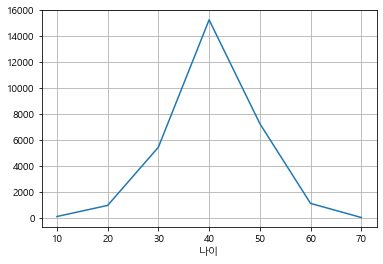

In [73]:
df.groupby(df.나이).골프장명.count().plot()
plt.grid()
# plt.edgecolor:      white # 그래프 축 색 설정
# plt.labelcolor:     white # 그래프 라벨  색 설정


In [7]:
df = pd.read_csv('정제한골프장데이터.csv')

In [8]:
df

,골프장명,골프장지역명,"대중제,회원제",홀수,사용일자,사용시간,성별코드,나이,"도민,비도민",판매업체명
0,중문GC,서귀포권,대중제,18,20210531,83537,1,40.0,도민,통화
1,더클래식CC,동부권,대중제,18,20210706,133106,2,40.0,도민,통화
2,더클래식CC,동부권,대중제,18,20210706,134812,2,40.0,도민,통화
3,제주CC,제주시권,대중제,18,20210706,134846,2,40.0,도민,통화
4,스프링데일CC,동부권,대중제,18,20210706,135804,1,40.0,도민,통화
...,...,...,...,...,...,...,...,...,...,...
30093,라온GC,서부권,대중제,27,20201224,1132,2,30.0,도민,라온GC
30094,아덴힐GC,서부권,대중제,18,20210115,809,1,40.0,도민,아덴힐GC
30095,아덴힐GC,서부권,대중제,18,20210113,816,2,40.0,도민,아덴힐GC
30096,아덴힐GC,서부권,대중제,18,20201228,1215,2,40.0,도민,아덴힐GC


In [ ]:
fig = plt. figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(range(len(df),df.골프장명))
df.groupby(df.나이).골프장명.count().plot()
plt.grid()

In [58]:
df.groupby([df.나이,df.골프장지역명,df.골프장명]).max()

대중제,회원제  홀수      사용일자    사용시간  성별코드 도민,비도민  판매업체명
나이   골프장지역명 골프장명                                                      
10.0 동부권    더클래식CC       대중제  18  20210913  170002     1     도민     통화
            부영CC         대중제  27  20211010  171549     1     도민     통화
            사이프러스CC  회원제+대중제  36  20211030  172006     1     도민     통화
            샤인빌CC        대중제  18  20211021  152849     1     도민     통화
            세인트포CC       대중제  36  20210930  172307     1     도민     통화
...                      ...  ..       ...     ...   ...    ...    ...
70.0 동부권    해비치CC    회원제+대중제  36  20200910     815     1     도민  해비치CC
     서부권    라온GC         대중제  27  20210928    1345     2     도민   라온GC
            아덴힐GC        대중제  18  20210924    1336     1     도민  아덴힐GC
     제주시권   제주CC         대중제  18  20210528  102353     1     도민     통화
            플라자CC제주      대중제   9  20210925  104547     1     도민     통화

[151 rows x 7 columns]

<AxesSubplot:>

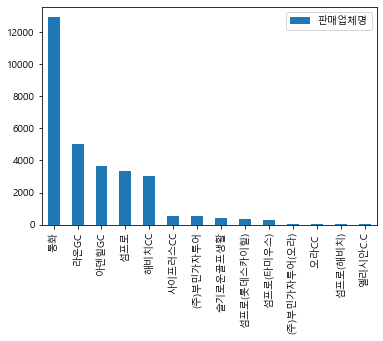

In [69]:
pd.DataFrame(df.판매업체명.value_counts()).plot.bar()

<AxesSubplot:xlabel='나이'>

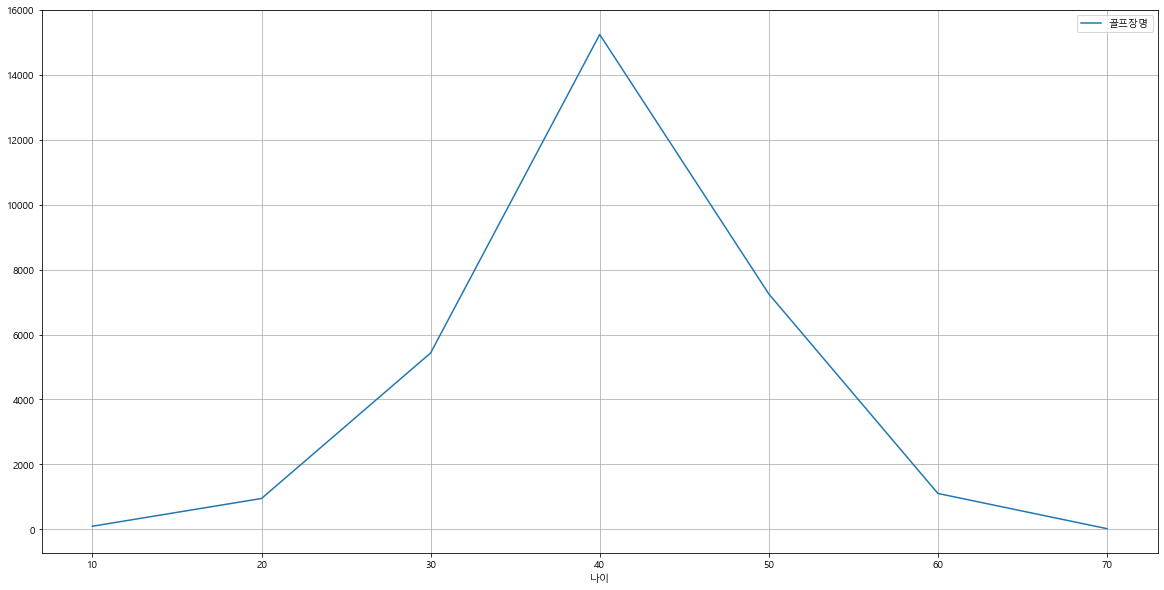

In [39]:
pd.DataFrame(df.groupby(df['나이']).골프장명.count()).plot(figsize=(20,10), grid=True)


In [43]:
len(df.골프장명.unique())

26

<AxesSubplot:xlabel='골프장명'>

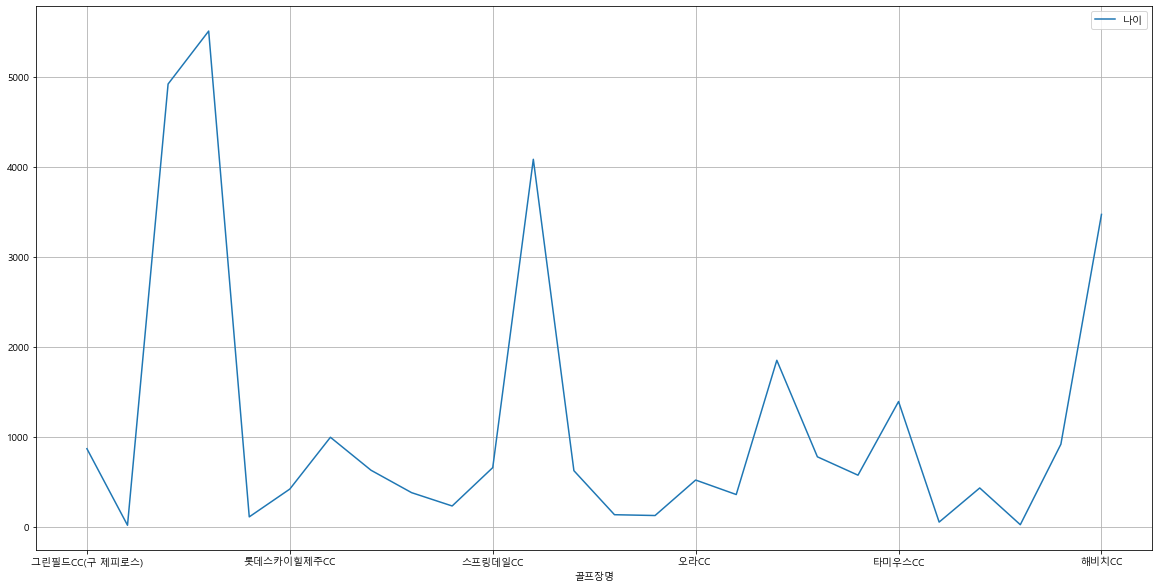

In [46]:
pd.DataFrame(df.groupby(df['골프장명']).나이.count()).plot(figsize=(20,10), grid=True)


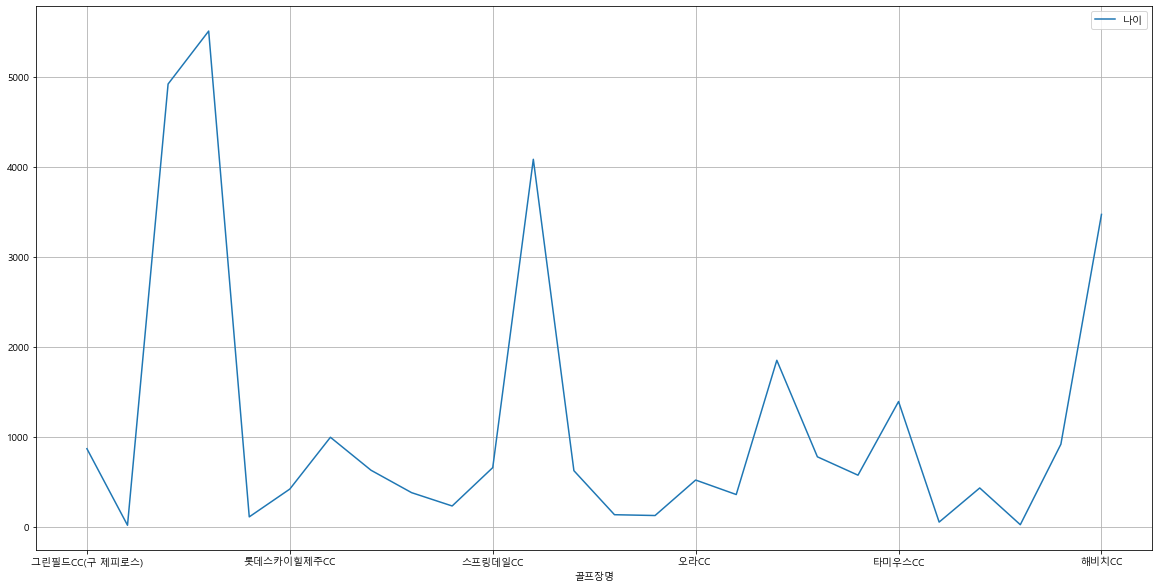

In [30]:
dfplot = df.groupby(df.골프장명).나이.count().plot(figsize=(20,10), grid=True)
dfplot.legend()

In [21]:
type(dfplot)

matplotlib.axes._subplots.AxesSubplot

In [11]:
df.groupby(['골프장지역명','골프장명'])

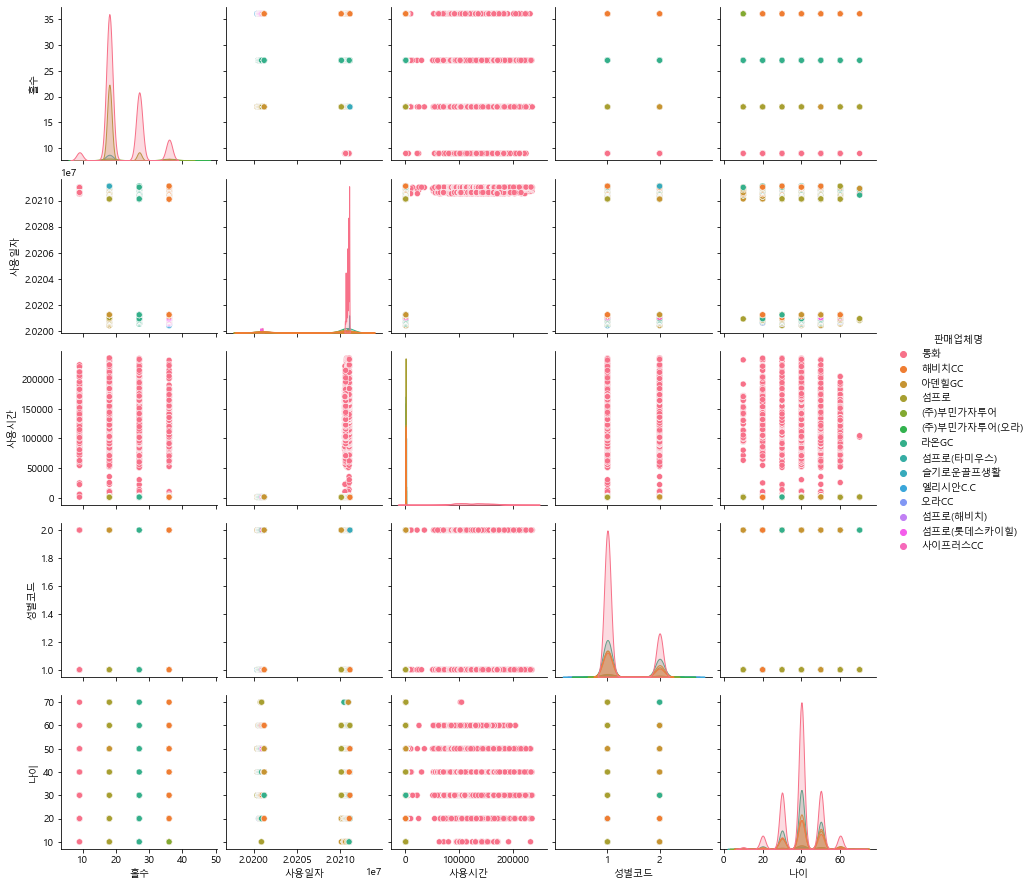

In [10]:
sns.pairplot(df,hue='판매업체명')

In [12]:
df.홀수.value_counts()

18    15005
27     9257
36     5403
9       433
Name: 홀수, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30098 entries, 0 to 30097
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   골프장명     30098 non-null  object 
 1   골프장지역명   30098 non-null  object 
 2   대중제,회원제  30098 non-null  object 
 3   홀수       30098 non-null  int64  
 4   사용일자     30098 non-null  int64  
 5   사용시간     30098 non-null  int64  
 6   성별코드     30098 non-null  int64  
 7   나이       30098 non-null  float64
 8   도민,비도민   30098 non-null  object 
 9   판매업체명    30098 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [75]:
df.ㄴ

,골프장명,골프장지역명,"대중제,회원제",홀수,사용일자,사용시간,성별코드,나이,"도민,비도민",판매업체명
0,중문GC,서귀포권,대중제,18,20210531,83537,1,40.0,도민,통화
1,더클래식CC,동부권,대중제,18,20210706,133106,2,40.0,도민,통화
2,더클래식CC,동부권,대중제,18,20210706,134812,2,40.0,도민,통화
3,제주CC,제주시권,대중제,18,20210706,134846,2,40.0,도민,통화
4,스프링데일CC,동부권,대중제,18,20210706,135804,1,40.0,도민,통화
...,...,...,...,...,...,...,...,...,...,...
30093,라온GC,서부권,대중제,27,20201224,1132,2,30.0,도민,라온GC
30094,아덴힐GC,서부권,대중제,18,20210115,809,1,40.0,도민,아덴힐GC
30095,아덴힐GC,서부권,대중제,18,20210113,816,2,40.0,도민,아덴힐GC
30096,아덴힐GC,서부권,대중제,18,20201228,1215,2,40.0,도민,아덴힐GC


In [79]:
df.사용일자[df.사용일자 < 20210101].value_counts()

20201007    98
20201015    88
20200930    86
20201013    76
20201214    70
            ..
20200518     1
20200519     1
20200427     1
20200501     1
20200511     1
Name: 사용일자, Length: 247, dtype: int64

In [80]:
df.사용일자[df.사용일자 >= 20210101].value_counts()

20211001    449
20211005    308
20211008    285
20210928    274
20210927    264
           ... 
20211123      2
20211106      2
20211110      2
20211118      1
20211119      1
Name: 사용일자, Length: 320, dtype: int64